---

# Ensemble Methods

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JamilyaSultan/RICE_INDE-577/blob/main/Supervised%20Learning/Ensemble%20Methods/Ensemble%20methods.ipynb)

**Ensemble methods** Ensemble methods is a machine learning technique that combines several base models in order to produce one optimal predictive model. 

When making Decision Trees, there are several factors we must take into consideration: On what features do we make our decisions on? What is the threshold for classifying each question into a yes or no answer? By adding an additional question, we hope to greater define the Yes and No classes.

This is where Ensemble Methods come in handy! Rather than just relying on one Decision Tree and hoping we made the right decision at each split, Ensemble Methods allow us to take a sample of Decision Trees into account, calculate which features to use or questions to ask at each split, and make a final predictor based on the aggregated results of the sampled Decision Trees. There are two most popular types of Ensemble methods:

1. **Bagging**

2. **Random Forests**

Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy dataset. In bagging, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once. After several data samples are generated, these weak models are then trained independently, and depending on the type of task—regression or classification, for example—the average or majority of those predictions yield a more accurate estimate. 

As a note, the random forest algorithm is considered an extension of the bagging method, using both bagging and feature randomness to create an uncorrelated forest of decision trees.



<img src="Wisdom-of-the-Crowd.jpg" alt="Drawing" style="width: 500px;"/>

Ensemble learning gives credence to the idea of the **wisdom of crowds** which suggests that the decision-making of a larger group of people is typically better than that of an individual expert. Similarly, ensemble learning refers to a group (or ensemble) of base learners, or models, which work collectively to achieve a better final prediction. A single model, also known as a base or weak learner, may not perform well individually due to high variance or high bias. However, when weak learners are aggregated, they can form a strong learner, as their combination reduces bias or variance, yielding better model performance.


https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f
https://www.ibm.com/cloud/learn/bagging

---

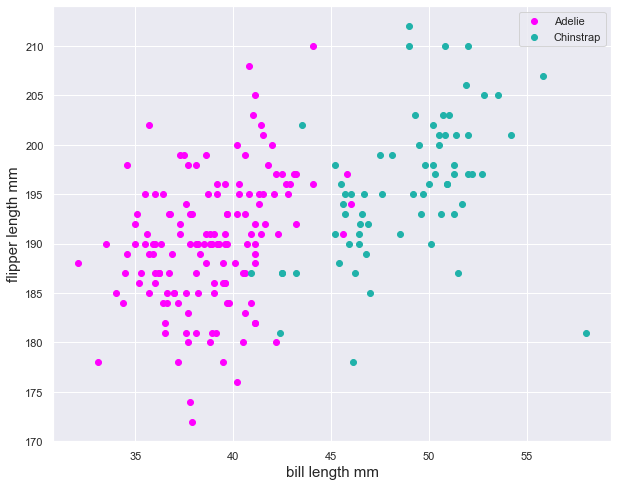

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("palmer_penguins.csv") 
df.dropna(inplace = True)


# Grab Adelie and Chinstrap
df = df[df["species"] != "Gentoo"]

# Create feature matrix
X = df[["bill_length_mm","flipper_length_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Adelie":
        return 0
    else:
        return 1
         
# Create target value array
y = df["species"].map(make_labels).to_numpy()

# Plot the data
penguins = ["Adelie", "Chinstrap"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguins, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.flipper_length_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length mm", fontsize = 15)
ax.set_ylabel("flipper length mm", fontsize = 15)
ax.legend()
plt.show()

Next we would run the three classifiers: Stump Tree, Decision Tree, and the Bagging classifier.
*A decision stump is a Decision Tree, which uses only a single attribute for splitting. For discrete attributes, this typically means that the tree consists only of a single interior node (i.e., the root has only leaves as successor nodes).*

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        60
           1       0.79      1.00      0.88        26

    accuracy                           0.92        86
   macro avg       0.89      0.94      0.91        86
weighted avg       0.94      0.92      0.92        86
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        60
           1       0.89      0.96      0.93        26

    accuracy                           0.95        86
   macro avg       0.94      0.96      0.95        86
weighted avg       0.96      0.95      0.95        86
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        60
           1       0.89      0.92      0.91        26

    accuracy                           0.94        86
   macro avg       0.93      0.94      

Great performance!

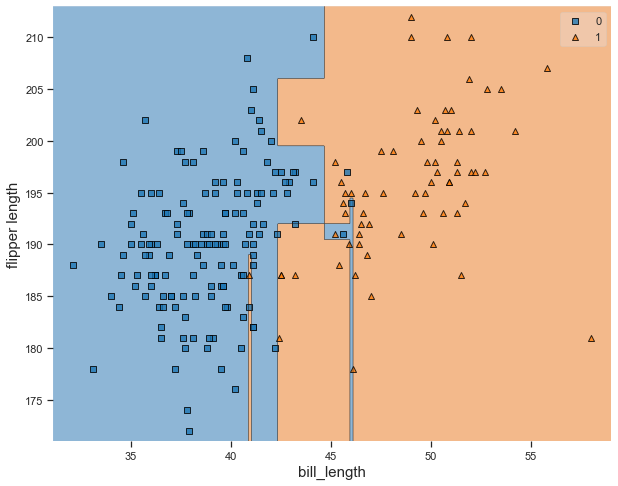

In [5]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("bill_length", fontsize = 15)
plt.ylabel("flipper length", fontsize = 15)
plt.grid()
plt.show()

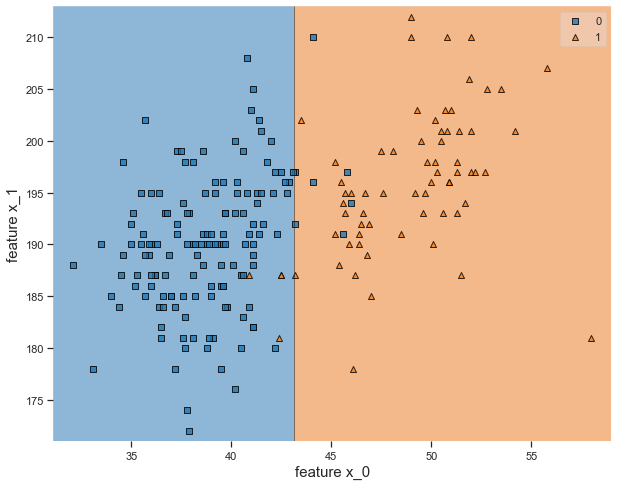

In [6]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

I would say that Bagging cancelled out the regions that were overlapping. 

----
### Random Forest

The Random Forest Algorithm combines the output of multiple (randomly created) Decision Trees to generate the final output.


<img src="random_forest.jpg" alt="Drawing" style="width: 500px;"/>

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        60
           1       0.89      0.96      0.93        26

    accuracy                           0.95        86
   macro avg       0.94      0.96      0.95        86
weighted avg       0.96      0.95      0.95        86
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        60
           1       0.89      0.92      0.91        26

    accuracy                           0.94        86
   macro avg       0.93      0.94      0.93        86
weighted avg       0.94      0.94      0.94        86
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        60
           1       0.92      0.92      0.92        26

    accuracy                           0.95        86
   macro avg       0.94      0.94     

The performance of three of clssifier is very satisfying, so let's look at the decision regions.

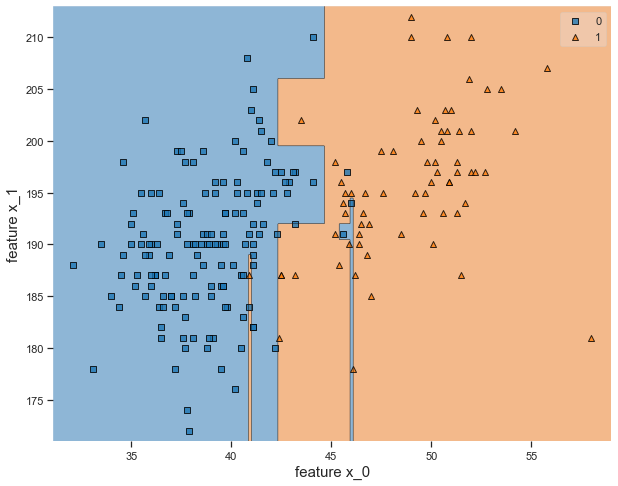

In [8]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

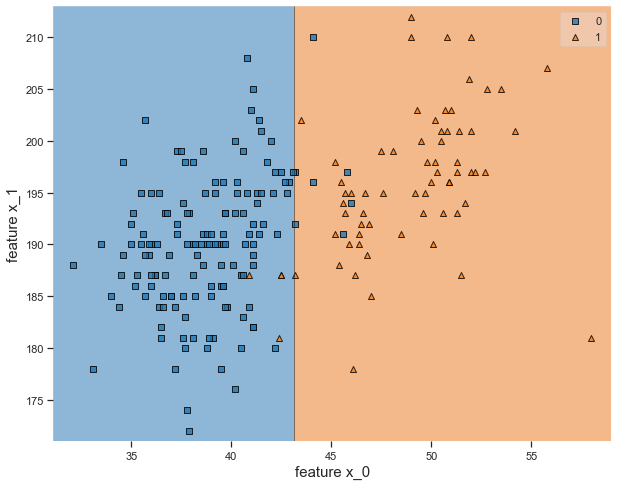

In [9]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

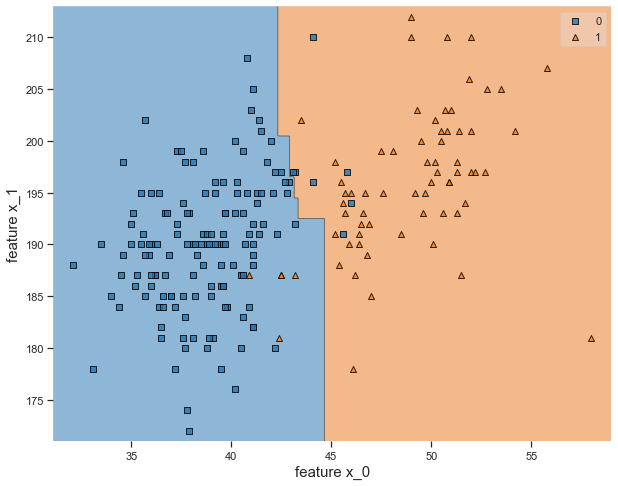

In [10]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

Next, we can try using all available features.

In [11]:
from sklearn.ensemble import RandomForestClassifier

X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 2)



tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       1.00      0.87      0.93        30

    accuracy                           0.95        86
   macro avg       0.97      0.93      0.95        86
weighted avg       0.96      0.95      0.95        86
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        56
           1       0.96      0.90      0.93        30

    accuracy                           0.95        86
   macro avg       0.96      0.94      0.95        86
weighted avg       0.95      0.95      0.95        86
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        56
           1       0.96      0.90      0.93        30

    accuracy                           0.95        86
   macro avg       0.96      0.94     

One of the useful functions that Random forest can do is to provide the **feature importance**.

In [12]:
names = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

bill_length_mm 0.48400000000000004
bill_depth_mm 0.11000000000000001
flipper_length_mm 0.3340000000000001
body_mass_g 0.07200000000000001


Indeed in the most of the model I used the bill_length and the flipper length. This also makes sense that those would be good features of birds to differentiate between them.